# 台灣犯罪圖解  資料日期: 104/01~107/03

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
crime = pd.read_csv('crime.csv')

### 資料筆數: 

In [3]:
crime.shape

(177801, 3)

### 資料範例:

In [4]:
crime.head(10)

,案類,發生日期,發生地點
0,住宅竊盜,1040101,台北市中山區
1,住宅竊盜,1040101,新北市永和區
2,住宅竊盜,1040101,台東縣台東市
3,住宅竊盜,1040101,台北市文山區
4,住宅竊盜,1040101,新北市三重區
5,住宅竊盜,1040101,新北市永和區
6,住宅竊盜,1040101,新北市三重區
7,住宅竊盜,1040101,新竹市北區
8,住宅竊盜,1040101,嘉義縣中埔鄉
9,住宅竊盜,1040101,台北市文山區


### 將發生日期拆為   年  月  日

In [5]:
#crime['發生日期'] = crime['發生日期'].astype(str)
crime['year'] = (crime['發生日期']//10000) + 1911 #西元轉換
crime['month'] = ((crime['發生日期'] + 19110000) - (10000 * crime['year']))//100
crime['day'] = crime['發生日期'] + 19110000 - (10000 * crime['year']) - (100 * crime['month'])

### 發現日期有 0 日  的錯誤資料

In [6]:
crime['day'].value_counts().sort_index().head()

0       9
1    7502
2    6217
3    6226
4    6415
Name: day, dtype: int64

### 刪除錯誤的資料

In [7]:
crime = crime[crime['day'] != 0]

In [8]:
crime.shape

(177792, 6)

### 將日期設為 Index
#### 並加入新columns : 星期幾?

In [9]:
crime.index = pd.to_datetime(10000 * crime.year + 100 * crime.month + crime.day, format='%Y%m%d')
crime = crime[['案類', '發生地點', 'year', 'month', 'day']]
crime['dayofweek'] = crime.index.dayofweek
crime.head(5)

,案類,發生地點,year,month,day,dayofweek
2015-01-01,住宅竊盜,台北市中山區,2015,1,1,3
2015-01-01,住宅竊盜,新北市永和區,2015,1,1,3
2015-01-01,住宅竊盜,台東縣台東市,2015,1,1,3
2015-01-01,住宅竊盜,台北市文山區,2015,1,1,3
2015-01-01,住宅竊盜,新北市三重區,2015,1,1,3


### 將發生地點拆為 縣市 和 鄉鎮區

In [10]:
crime['縣市'] = crime['發生地點'].str[0:3]
crime['鄉鎮區'] = crime['發生地點'].str[3:]

### 檢查空值

In [11]:
display(crime['鄉鎮區'].isnull().any())
display(crime['鄉鎮區'].isnull().sum())

True

1

### 刪去空值

In [12]:
crime = crime[crime['鄉鎮區'].notnull()]
crime.shape

(177791, 8)

### 發現縣市出現了奇怪的'新竹鹿?', '台灣海?'

##### 刪除 新竹鹿, 外國, 台灣海 

In [13]:
crime['縣市'].value_counts().tail()

澎湖縣    230
連江縣     34
外國       5
新竹鹿      1
台灣海      1
Name: 縣市, dtype: int64

In [14]:
crime = crime[crime['縣市'] != '新竹鹿']
crime = crime[crime['縣市'] != '台灣海']
crime = crime[crime['縣市'] != '外國']
crime.shape

(177784, 8)

### 將 縣市 案類 星期 加入階層Index 並排序Index

In [15]:
crime.head()

,案類,發生地點,year,month,day,dayofweek,縣市,鄉鎮區
2015-01-01,住宅竊盜,台北市中山區,2015,1,1,3,台北市,中山區
2015-01-01,住宅竊盜,新北市永和區,2015,1,1,3,新北市,永和區
2015-01-01,住宅竊盜,台東縣台東市,2015,1,1,3,台東縣,台東市
2015-01-01,住宅竊盜,台北市文山區,2015,1,1,3,台北市,文山區
2015-01-01,住宅竊盜,新北市三重區,2015,1,1,3,新北市,三重區


In [16]:
crime = crime.set_index(['year', 'month', 'day', 'dayofweek', '縣市', '案類']).sort_index()
crime.head(20)

發生地點  鄉鎮區
year month day dayofweek 縣市  案類               
2015 1     1   3         南投縣 機車竊盜  南投縣草屯鎮  草屯鎮
                         台中市 機車竊盜     台中市     
                             機車竊盜     台中市     
                             機車竊盜     台中市     
                             機車竊盜     台中市     
                             機車竊盜   台中市北區   北區
                             毒品    台中市神岡區  神岡區
                             毒品     台中市北區   北區
                             毒品    台中市大里區  大里區
                             毒品    台中市潭子區  潭子區
                             毒品     台中市北區   北區
                             毒品    台中市北屯區  北屯區
                             毒品    台中市梧棲區  梧棲區
                             汽車竊盜  台中市龍井區  龍井區
                             汽車竊盜  台中市北屯區  北屯區
                         台北市 住宅竊盜  台北市中山區  中山區
                             住宅竊盜  台北市文山區  文山區
                             住宅竊盜  台北市文山區  文山區
                             強制性交  台北市文山區  文山區
                             機車竊盜  台北市萬華區  萬華區

### 資料整理完成 開始討論

## 案類比例

In [17]:
ckind = crime.pivot_table('發生地點', index='案類', aggfunc='count')
ckind = ckind/ckind.values.sum()*100
ckind.columns = ['犯罪比例(%)']
ckind.sort_values(by='犯罪比例(%)')

,犯罪比例(%)
案類,
搶奪,0.511857
強盜,0.522544
強制性交,0.598479
住宅竊盜,4.796832
汽車竊盜,6.914008
機車竊盜,22.999820
毒品,63.656460


毒品最大宗 約占了64%

搶奪 強盜 強制性交 強迫他人的犯罪約在0.5%

偷竊以機車竊盜最為嚴重 23%

## 案發地點討論
### 先設定資料範圍

In [18]:
sty= 15# int(input('年份(15~18):'))
stm= 1# int(input('月份(1~12):'))
edy = 17# int(input('至(~18)年:'))
edm = 12# int(input('(1~12)月:'))
crime = crime.loc[(2000 + sty,stm):(2000 + edy, edm)]
print('資料筆數:%d'%(crime.shape[0]))

資料筆數:166642


### 這裡要抓入台灣縣市人口數資料

In [19]:
place = crime.pivot_table('發生地點', index='縣市', aggfunc='count').reset_index().sort_values(by='縣市')
place.columns = ['縣市', '犯罪次數']
pop = pd.read_csv('TW_pop.csv').sort_values(by='縣市')
pop.iloc[12:16,0] = '台' + pop.iloc[12:16,0].str[1:]
place = pd.merge(place, pop).set_index('縣市')
place['次/萬人'] = place['犯罪次數']/place['人口數'] * 10000
place = place.sort_values(by='次/萬人').iloc[:,[0,2]]
place

,犯罪次數,次/萬人
縣市,,
金門縣,244,17.751135
連江縣,27,20.962733
澎湖縣,219,21.042922
嘉義縣,2059,40.279196
彰化縣,6109,47.635088
台中市,14462,51.889619
台東縣,1179,53.703198
台南市,11105,58.864938
台北市,15916,59.315973


## 細部案類討論

In [20]:
pcek = crime.pivot_table('發生地點', index='縣市', columns='案類', aggfunc='count').reset_index().sort_values(by='縣市')
pcek = pd.merge(pcek, pop).set_index('縣市')
pcek.iloc[:,0:7] = (pcek.iloc[:,0:7].T/pcek.iloc[:,7]*10000).fillna(0).T
pcek = pcek.iloc[:,0:7]
pcek.columns.name = '次/萬人'
pcek

次/萬人,住宅竊盜,強制性交,強盜,搶奪,機車竊盜,毒品,汽車竊盜
縣市,,,,,,,
南投縣,6.486366,0.898112,0.618699,0.359245,17.044173,45.105189,6.366617
台中市,1.524899,0.283452,0.236808,0.276276,13.505222,32.837352,3.225610
台北市,4.699513,0.648466,0.264604,0.313052,8.169176,44.237283,0.983879
台南市,5.502189,0.784512,0.487670,0.445264,15.531226,30.574783,5.539294
台東縣,1.958641,0.045550,0.136649,0.091100,14.484832,35.893231,1.093195
嘉義市,2.152948,1.559032,0.371198,0.185599,10.616263,54.788825,7.275481
嘉義縣,1.447625,0.899875,0.215188,0.176063,5.986126,26.820193,4.734126
基隆市,6.111054,1.372968,0.915312,0.538419,16.906353,99.634414,2.153676
宜蘭縣,5.781777,0.722722,0.481815,0.175205,11.497853,45.772404,5.869380


## 案類分類排名:
#### 外島(澎湖 金門 馬祖)汽機車失竊特別低  但在住宅竊盜不輸本島
#### 汽機車竊盜罪嚴重在桃園新竹一帶
#### 基隆市毒品格外嚴重

In [21]:
for n in range(7):
    print(pcek.columns[n])
    display(pd.DataFrame((pcek.iloc[:,n]).sort_values(ascending=False)))
    print('')

住宅竊盜


,住宅竊盜
縣市,
南投縣,6.486366
基隆市,6.111054
澎湖縣,5.957357
宜蘭縣,5.781777
雲林縣,5.779484
花蓮縣,5.710172
台南市,5.502189
連江縣,5.434783
苗栗縣,5.073970



強制性交


,強制性交
縣市,
嘉義市,1.559032
基隆市,1.372968
澎湖縣,1.153037
金門縣,1.091258
嘉義縣,0.899875
南投縣,0.898112
台南市,0.784512
花蓮縣,0.759331
宜蘭縣,0.722722



強盜


,強盜
縣市,
基隆市,0.915312
南投縣,0.618699
雲林縣,0.564912
新竹縣,0.525202
花蓮縣,0.516345
苗栗縣,0.505591
台南市,0.487670
宜蘭縣,0.481815
新北市,0.421402



搶奪


,搶奪
縣市,
高雄市,0.781444
連江縣,0.776398
基隆市,0.538419
台南市,0.445264
新竹市,0.385372
彰化縣,0.382079
新北市,0.363710
屏東縣,0.361472
南投縣,0.359245



機車竊盜


,機車竊盜
縣市,
桃園市,34.396442
新竹市,30.761767
新竹縣,22.583666
高雄市,21.563521
南投縣,17.044173
新北市,16.981510
基隆市,16.906353
台南市,15.531226
屏東縣,14.892661



毒品


,毒品
縣市,
基隆市,99.634414
桃園市,67.179551
花蓮縣,59.410091
新北市,57.676934
屏東縣,55.847478
嘉義市,54.788825
宜蘭縣,45.772404
南投縣,45.105189
台北市,44.237283



汽車竊盜


,汽車竊盜
縣市,
新竹縣,16.860780
桃園市,10.612349
苗栗縣,8.576995
嘉義市,7.275481
屏東縣,6.916171
高雄市,6.456812
新竹市,6.392644
南投縣,6.366617
宜蘭縣,5.869380


## 犯罪的周末?
#### 星期幾與犯罪數的關係

,次數
星期?,
1,24482
2,25924
3,25998
4,24884
5,23310
6,21011
7,21033


Text(0.5, 0, 'dayofweek')

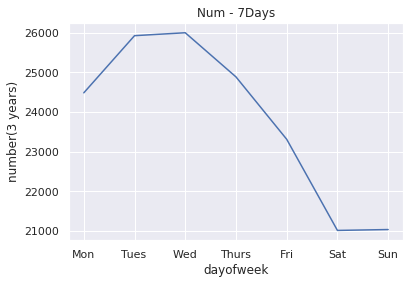

In [22]:
cweek = crime.pivot_table('發生地點', index='dayofweek', aggfunc='count')
cweek.index = [1,2,3,4,5,6,7]
cweek.index.name = '星期?'
cweek.columns = ['次數']
display(cweek)
plt.plot(cweek)
plt.title('Num - 7Days')
plt.gca().set_xticklabels(['', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('number(3 years)')
plt.xlabel('dayofweek')

In [23]:
print('周末與平日的案件比例 : %.03f'%(cweek.values[5:].mean()/cweek.values[0:5].mean()))

周末與平日的案件比例 : 0.844



### 周末案件數約平日的80％  周休二日還沒確切落實在罪犯和警察身上
### 接著細部探究犯案種類和星期幾的關係

In [24]:
ckweek = crime.pivot_table('發生地點', index='dayofweek', columns='案類', aggfunc='count')
ckweek.index = [1,2,3,4,5,6,7]
ckweek.index.name = '星期'
ckweek = ckweek/ckweek.sum()*100
ckweek.columns.name = '案類(%)'
display(ckweek)

案類(%),住宅竊盜,強制性交,強盜,搶奪,機車竊盜,毒品,汽車竊盜
星期,,,,,,,
1,15.386534,13.960396,13.272311,15.109573,15.501559,14.203658,16.012933
2,14.576060,14.158416,14.187643,16.955017,14.203587,16.215470,14.966392
3,13.279302,13.663366,14.759725,14.648212,13.955746,16.540293,14.575002
4,14.164589,10.396040,15.903890,13.264129,13.917420,15.518194,14.047477
5,15.199501,14.455446,15.331808,13.494810,14.234248,13.746428,14.396324
6,13.977556,17.722772,12.013730,13.379469,14.034953,11.933702,12.498936
7,13.416459,15.643564,14.530892,13.148789,14.152486,11.842256,13.502935


In [25]:
ckweek = pd.DataFrame((100 * ckweek.iloc[5:].mean()/ckweek.iloc[0:5].mean()).sort_values())
ckweek.index.name = '案類'
ckweek.columns = ['周末/平日(%)']
ckweek

,周末/平日(%)
案類,
毒品,77.980505
汽車竊盜,87.846384
搶奪,90.266876
強盜,90.342679
住宅竊盜,94.324231
機車竊盜,98.128513
強制性交,125.185736


#### 強制性交在假日有明顯提高 周末要格外提防
#### 毒品在假日比較少  果然寂寞的時候才要吸毒
#### 機車竊盜假日平日並無不同

## 犯罪會跟日期365天有關嗎?
#### 看圖似乎有四季變化 圖形震盪就是顯示平日和假日一周變化

/home/sppool/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.legend(*args, **kwargs)>

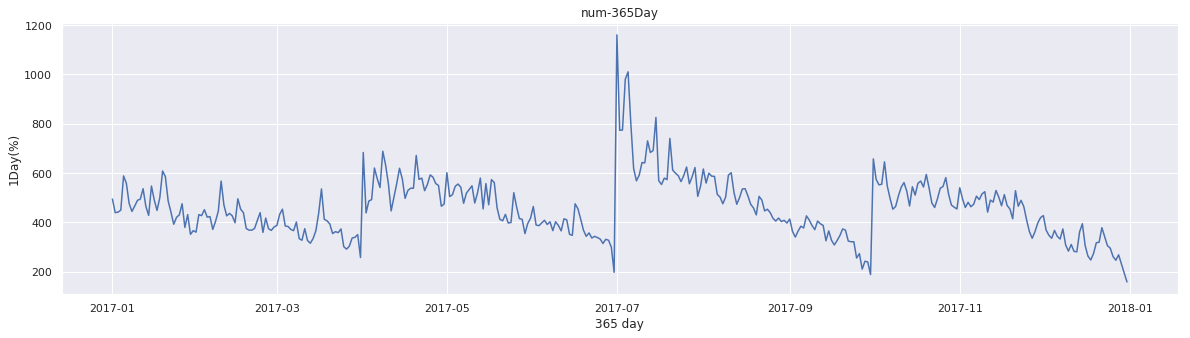

In [26]:
cday = crime.pivot_table('發生地點', index=['month', 'day'], aggfunc='count')
cday = cday.loc[(1, 1):(2, 28)].append(cday.loc[(3, 1):(12, 31)]) #除去(2/29)資料
cday.index = [pd.datetime(2017, month, day) for (month, day) in cday.index]
fig = plt.figure(figsize=(20, 5))
plt.plot(cday)
plt.title('num-365Day')
plt.ylabel('1Day(%)')
plt.xlabel('365 day')
plt.legend

### 畫上2周均線 讓線圖更柔化  並將y軸歸零
#### 並透過 Cosine window 讓圖形看起來平滑

<function matplotlib.pyplot.legend(*args, **kwargs)>

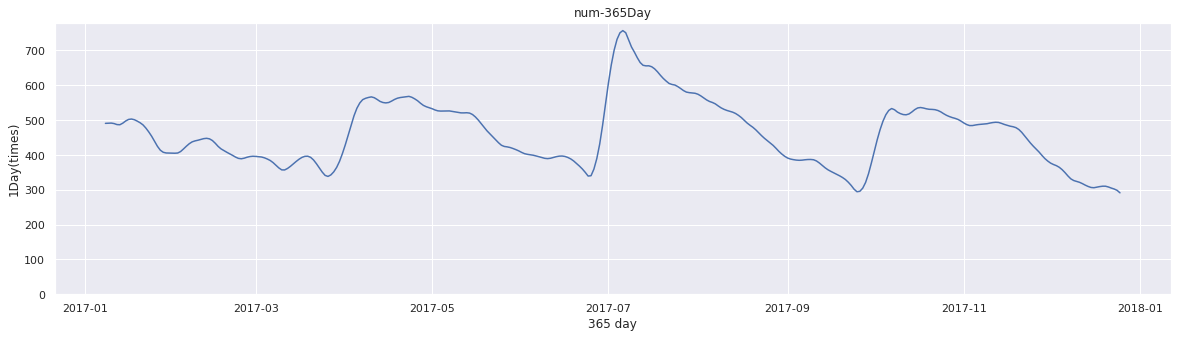

In [27]:
rolling = cday.rolling(14, center=True, win_type='cosine')
data = rolling.mean()

fig = plt.figure(figsize=(20, 5))
plt.plot(data)
plt.title('num-365Day')
plt.ylabel('1Day(times)')
plt.ylim(0,)
plt.xlabel('365 day')
plt.legend

### 住宅竊盜和毒品有明顯四季變化
#### 每一季3個月循環 並緩慢下降
#### 毒品在七月初達到最高峰(暑假開始的原因??)

住宅竊盜


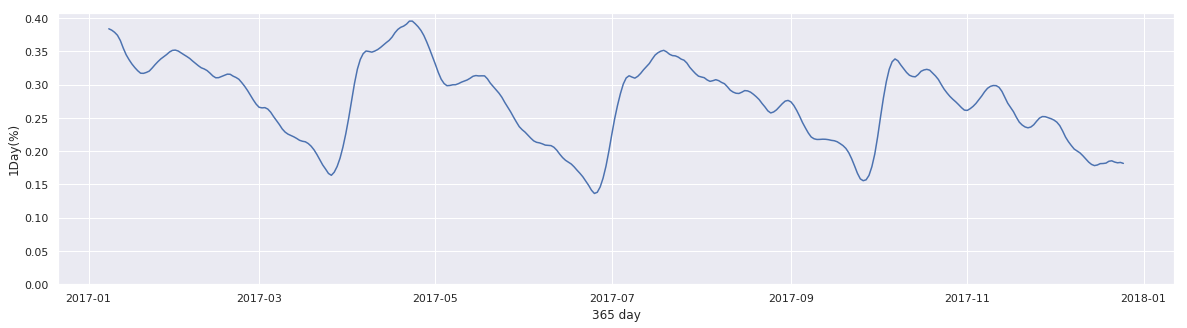

強制性交


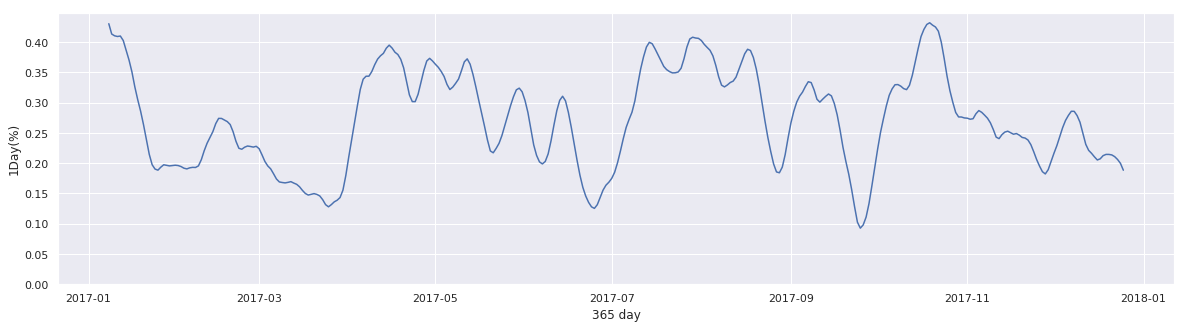

強盜


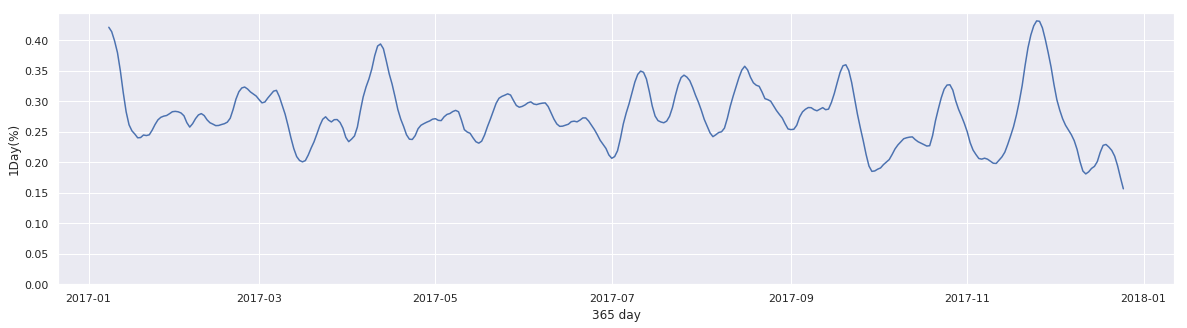

搶奪


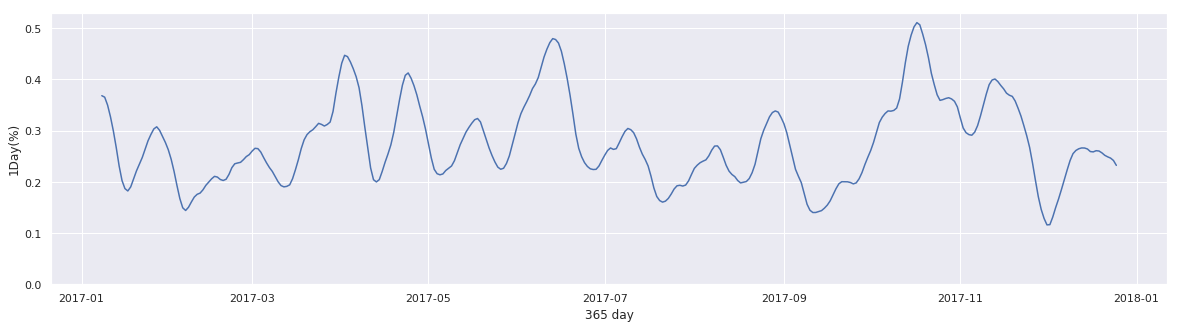

機車竊盜


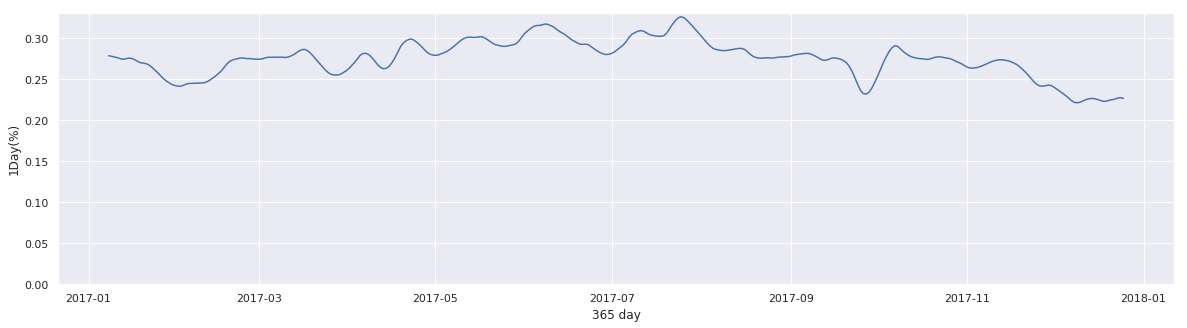

毒品


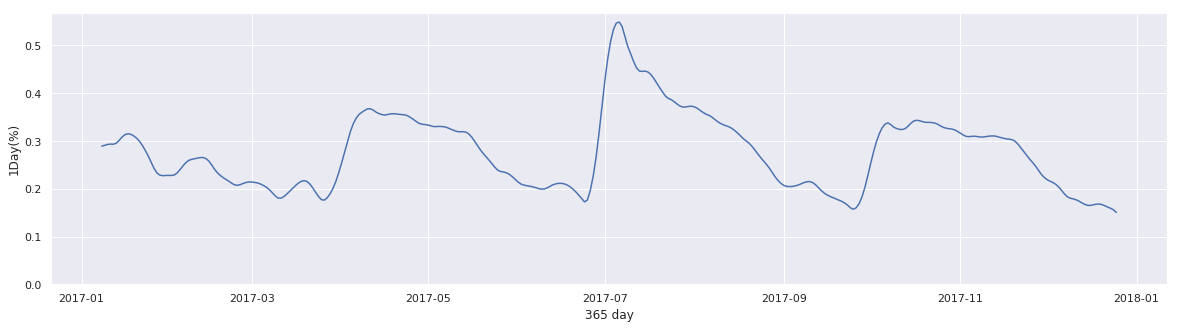

汽車竊盜


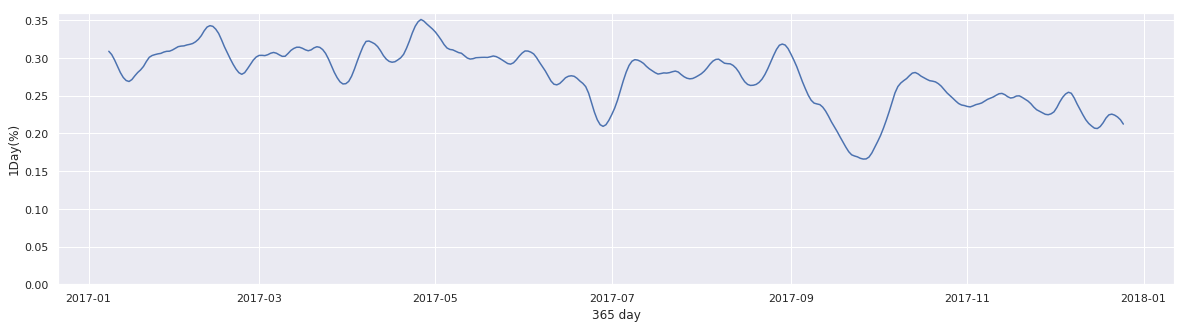

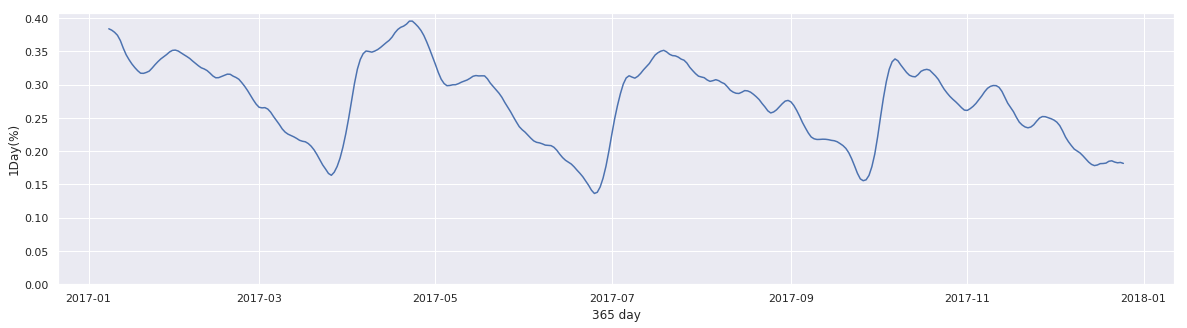

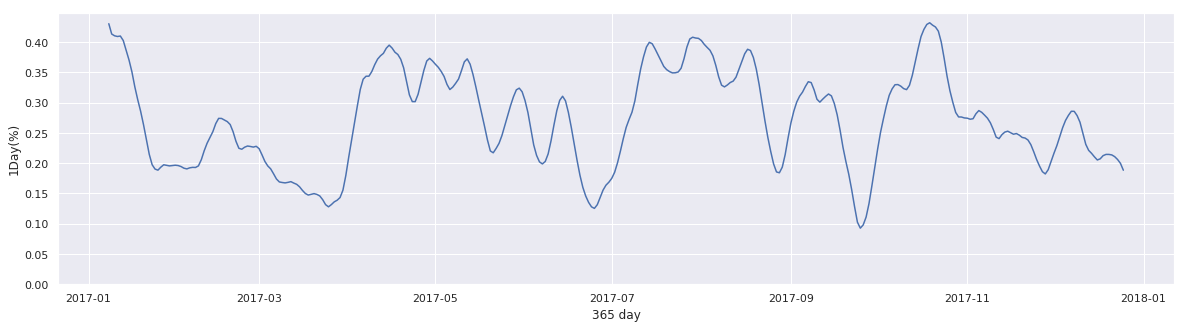

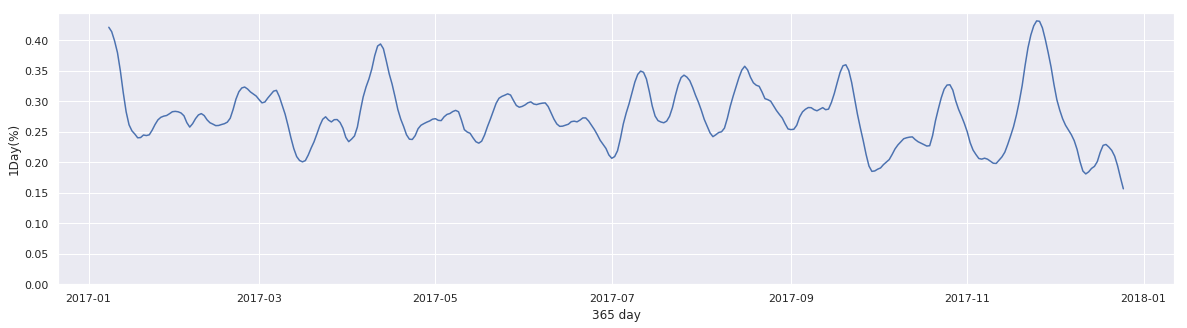

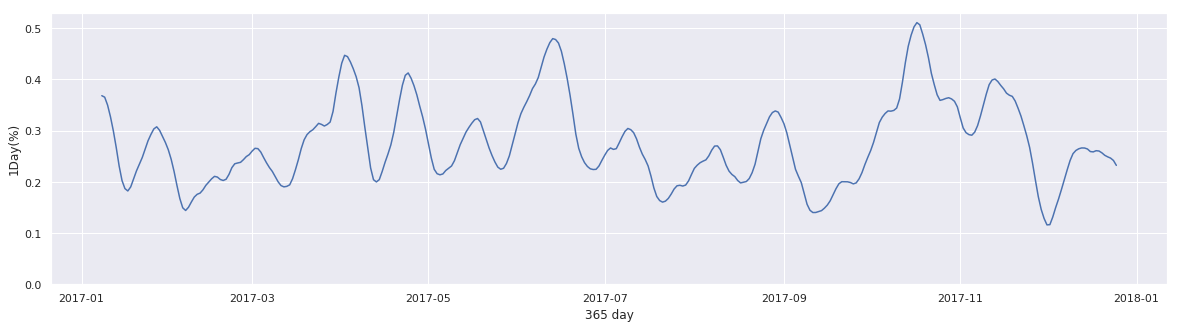

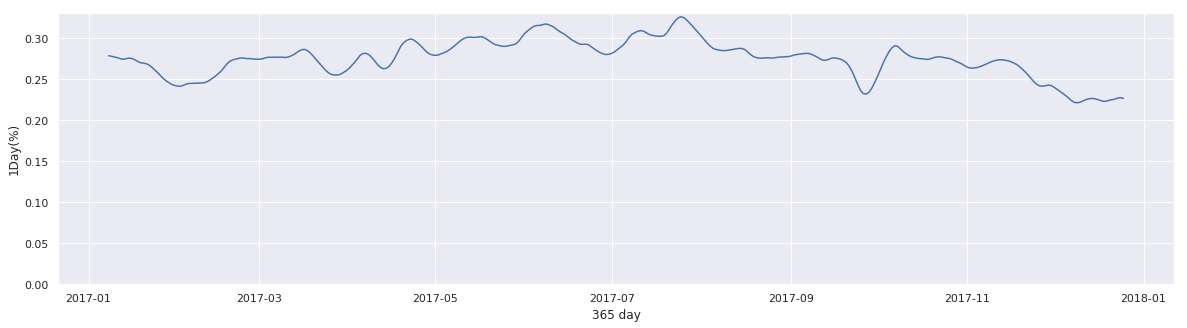

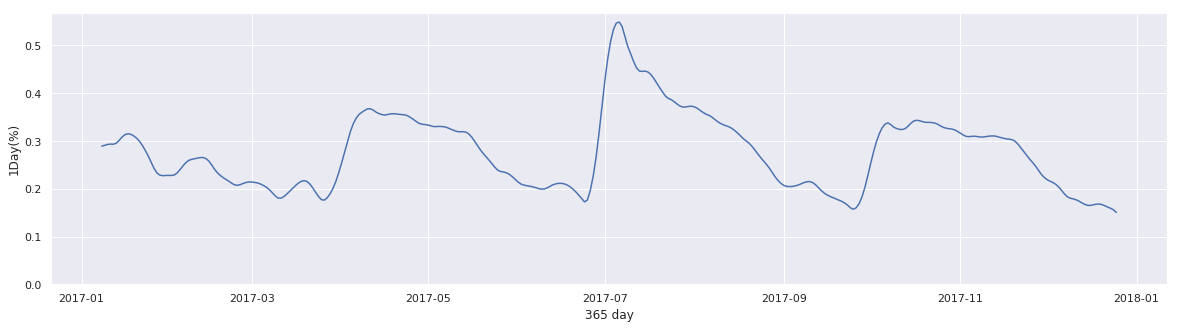

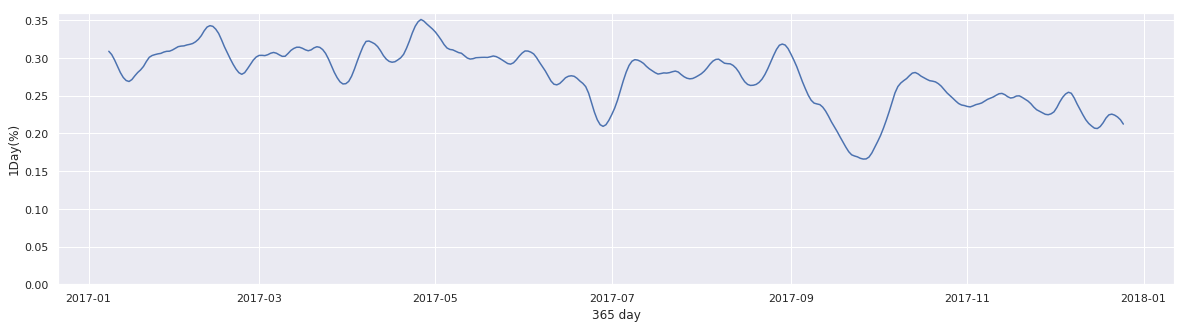

In [28]:
ckday = crime.pivot_table('發生地點', index=['month', 'day'], columns='案類',aggfunc='count').fillna(0)
ckday = ckday.loc[(1, 1):(2, 28)].append(ckday.loc[(3, 1):(12, 31)]) #除去(2/29)資料
ckday.index = [pd.datetime(2017, month, day) for (month, day) in ckday.index]
ckday = ckday/ckday.sum()*100
for n in range(7):
    rolling = ckday.iloc[:,n].rolling(14, center=True, win_type='cosine')
    fig = plt.figure(figsize=(20, 5))
    plt.plot(rolling.mean())
    plt.ylabel('1Day(%)')
    plt.ylim(0,)
    plt.xlabel('365 day')
    print(ckday.columns[n])
    display(fig)